### Data Preprocessing
The data downloaded from GEO is either tab delimited or unstructured series matrix. This notebook will convert all data to csv format and extract metadata from the series matrix file.

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gzip

### GSE152004

In [2]:
##############################
# GSE152004
##############################

# path to your downloaded file
GSE152004_file_path_norm = 'downloads/GSE152004_695_expr_norm.txt.gz'
GSE152004_metadata_path = 'downloads/GSE152004_series_matrix.txt.gz'

# prepare metadata
with gzip.open(GSE152004_metadata_path, 'rt') as file:
    GSE152004_metadata_df = pd.read_csv(file, sep='\t', skiprows = 46)
    GSE152004_metadata_df.index = GSE152004_metadata_df.iloc[:,0]
    GSE152004_metadata_df = GSE152004_metadata_df.iloc[:,1:].T.iloc[:,[9]]
    GSE152004_metadata_df["SampleNames"] = GSE152004_metadata_df.index
    GSE152004_metadata_df["Type"] = [term.split(": ")[-1] for term in GSE152004_metadata_df["!Sample_characteristics_ch1"]]
    GSE152004_metadata_df.drop(["!Sample_characteristics_ch1"], axis = 1, inplace = True)

# Read the raw gzipped file into a pandas DataFrame
with gzip.open(GSE152004_file_path_norm, 'rt') as file:
    GSE152004_norm = pd.read_csv(file, sep='\t')
    GSE152004_norm.index.name = "gene_id"
    new_cols_order = [col for col in GSE152004_metadata_df.index]
    GSE152004_norm = GSE152004_norm[new_cols_order]

# Save dataframes to CSV files
GSE152004_norm.dropna(axis =1, inplace = True)
GSE152004_norm.to_csv('data1/GSE152004_norm_data.csv')
GSE152004_metadata_df.to_csv('data1/GSE152004_metadata.csv', index=True, index_label = "")

In [3]:
GSE152004_norm.head()

,HR1005,HR1006,HR1009,HR1010,HR1012,HR1016,HR1038,HR1046,HR1065,HR1082,...,HR5710,HR5725,HR5726,SJ1079,SJ1107,SJ1176,SJ1423,SJ5046,SJ5108,SJ5401
gene_id,,,,,,,,,,,,,,,,,,,,,
A1BG,12.047600,16.204622,21.992452,9.808778,11.376166,20.249513,2.859408,8.493167,30.223057,16.277353,...,12.864230,14.411482,19.408916,13.569455,14.989360,13.821017,9.002771,21.628777,14.913016,13.100101
A1BG-AS1,12.047600,13.645997,12.936737,3.772607,21.330311,7.788274,7.148520,7.431521,27.074822,9.947271,...,2.572846,4.003190,12.615796,8.141673,24.357710,10.135412,12.861101,11.741336,13.048889,4.366700
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A2M,531.815488,382.940804,169.471249,130.532202,1083.579785,531.160305,135.821882,679.453351,624.609837,173.625098,...,248.279640,618.893107,2208.734661,1301.763067,502.143551,1291.804386,1244.954558,621.672858,685.998729,889.715207
A2M-AS1,75.727772,23.880496,29.754494,26.408249,28.440414,46.729646,21.445560,61.575460,43.445644,30.746111,...,19.296345,36.028706,32.024712,26.234280,31.852389,37.777446,39.869413,54.380926,25.165714,52.946242


In [4]:
#display
GSE152004_metadata_df.head()

!Sample_title,SampleNames,Type
HR1005,HR1005,asthmatic
HR1006,HR1006,asthmatic
HR1009,HR1009,asthmatic
HR1010,HR1010,asthmatic
HR1012,HR1012,asthmatic


<Axes: xlabel='Type'>

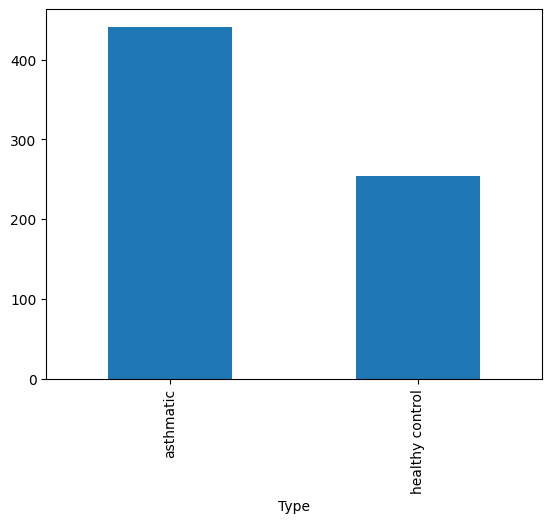

In [5]:
GSE152004_metadata_df["Type"].value_counts().plot.bar()

### GSE58434

In [6]:
##############################
# GSE58434
##############################

# path to your downloaded file
GSE58434_file_path_norm = 'downloads/GSE58434_All_Sample_FPKM_Matrix.txt.gz'
GSE58434_metadata_path = 'downloads/GSE58434_series_matrix.txt.gz'

# read metadata
with gzip.open(GSE58434_metadata_path, 'rt') as file:
    Type = {"Asthma": "asthmatic", "Control":"healthy control"}
    GSE58434_metadata_df = pd.read_csv(file, sep='\t', skiprows = 33)
    GSE58434_metadata_df.index = GSE58434_metadata_df.iloc[:,0]
    GSE58434_metadata_df = GSE58434_metadata_df.iloc[:,1:].T.iloc[:,:]
    GSE58434_metadata_df["Type"] = [Type[term.split(": ")[-1]] for term in GSE58434_metadata_df.iloc[:,8]]
    GSE58434_metadata_df["Treatment"] = [term.split(": ")[-1] for term in GSE58434_metadata_df.iloc[:,9]]
    GSE58434_metadata_df["Donor"] = [term.split(": ")[-1] for term in GSE58434_metadata_df.iloc[:,10]]
    GSE58434_metadata_df["Sample Names"] = GSE58434_metadata_df.index
    GSE58434_metadata_df = GSE58434_metadata_df[["Sample Names","Type", "Treatment", "Donor"]]


# Read the norm gzipped file into a pandas DataFrame
with gzip.open(GSE58434_file_path_norm, 'rt') as file:
    GSE58434_count_norm = pd.read_csv(file, sep='\t')
    GSE58434_count_norm.index = GSE58434_count_norm.gene_id
    new_cols_order = [col for col in GSE58434_metadata_df.index if col in GSE58434_count_norm.columns]
    GSE58434_metadata_df = GSE58434_metadata_df.loc[new_cols_order,:]
    GSE58434_count_norm = GSE58434_count_norm[new_cols_order]

# Save dataframes to CSV files
GSE58434_count_norm.dropna(axis = 1, inplace = True)
GSE58434_count_norm.to_csv('data1/GSE58434_norm_data.csv')
GSE58434_metadata_df.to_csv('data1/GSE58434_metadata.csv', index=True, index_label = "")

In [7]:
GSE58434_count_norm.head()

,S-001167453,S-001167456,S-001167457,S-001167458,S-001167459,S-001167461,S-001167462,S-001167463,S-001167464,S-001167465,...,S-001167497,S-001167498,S-001167499,S-001167500,S-001167501,S-001167502,S-001167503,S-001167504,S-001167505,S-001167506
gene_id,,,,,,,,,,,,,,,,,,,,,
1/2-SBSRNA4,0.486713,0.213607,0.328667,0.193905,0.415307,0.458671,0.297303,0.538321,0.231150,0.383123,...,0.328195,0.311245,0.403084,0.524565,0.202955,0.197280,0.255661,0.472804,0.523494,0.294798
A1BG,6.678630,6.067810,5.660540,9.010040,6.416910,8.253120,7.841930,4.677510,7.947110,4.747560,...,7.290920,5.032410,5.386140,8.804290,8.387240,7.528840,4.969940,5.227810,5.106350,4.186550
A1BG-AS1,0.800632,0.976157,1.011490,0.831169,0.848899,1.095940,1.058180,0.526731,0.822181,0.806242,...,0.678327,0.383134,1.374250,0.822418,0.642642,0.723851,0.919801,0.838515,0.594999,0.714226
A1CF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002874,0.000000,0.003185,0.000000,0.000000,0.002431,0.000000,0.000000,0.000000,0.000000
A2LD1,2.767460,2.234260,2.972340,2.930060,2.283780,2.498130,2.605640,2.165430,2.261830,2.624800,...,2.564390,2.221620,2.242760,2.970300,2.259660,3.029830,2.546620,2.519360,2.743380,1.943290


In [8]:
GSE58434_metadata_df.head()

!Sample_title,Sample Names,Type,Treatment,Donor
S-001167453,S-001167453,asthmatic,Vitamin-D,AS070808-M59
S-001167456,S-001167456,healthy control,Vitamin-D,N090710-F52
S-001167457,S-001167457,healthy control,Vitamin-D,N120610-M50
S-001167458,S-001167458,asthmatic,Vitamin-D,AS012811-M9
S-001167459,S-001167459,asthmatic,Vitamin-D,AS021111-F44


<Axes: xlabel='Type'>

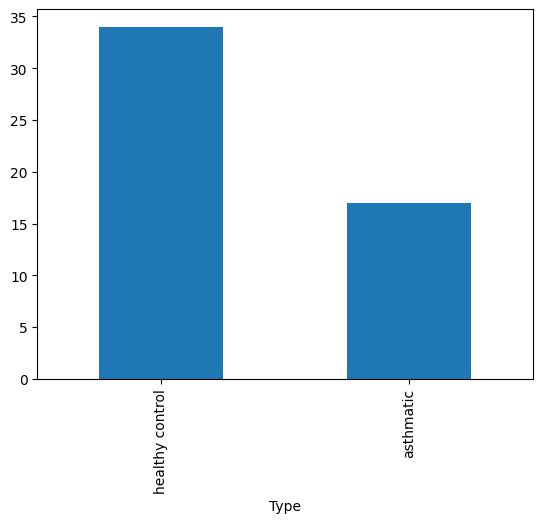

In [9]:
GSE58434_metadata_df["Type"].value_counts().plot.bar()

### GSE201955

In [10]:
##############################
# GSE201955
##############################

# path to your downloaded file
GSE201955_file_path_processed = 'downloads/GSE201955_RNAseq_118_processeddata.txt.gz'
GSE201955_metadata_path = 'downloads/GSE201955-GPL20301_series_matrix.txt.gz'
Type = {"Asthma": "asthmatic", "Control":"healthy control"}

# read metadata
with gzip.open(GSE201955_metadata_path, 'rt') as file:
    GSE201955_metadata_df = pd.read_csv(file, sep='\t', skiprows = 31)
    GSE201955_metadata_df.index = GSE201955_metadata_df.iloc[:,0]
    GSE201955_metadata_df = GSE201955_metadata_df.iloc[:,1:].T.iloc[:,:]
    GSE201955_metadata_df.index = GSE201955_metadata_df.iloc[:,34]
    GSE201955_metadata_df["Age"] = [int(term.split(": ")[-1]) for term in GSE201955_metadata_df.iloc[:,11]]
    GSE201955_metadata_df["Gender"] = [term.split(": ")[-1] for term in GSE201955_metadata_df.iloc[:,12]]
    GSE201955_metadata_df["Ethnicity"] = [term.split(": ")[-1] for term in GSE201955_metadata_df.iloc[:,13]]
    GSE201955_metadata_df["Type"] = [Type[term.split(": ")[-1]] for term in GSE201955_metadata_df.iloc[:,14]]
    GSE201955_metadata_df["Maternal Asthma"] = [term.split(": ")[-1] for term in GSE201955_metadata_df.iloc[:,15]]
    GSE201955_metadata_df["Smoking"] = [term.split(": ")[-1] for term in GSE201955_metadata_df.iloc[:,26]]
    GSE201955_metadata_df["Sample Names"] = GSE201955_metadata_df.index
    GSE201955_metadata_df = GSE201955_metadata_df[["Sample Names","Age", "Gender", "Ethnicity", "Type", "Maternal Asthma", "Smoking"]]


# Read the raw gzipped file into a pandas DataFrame
with gzip.open(GSE201955_file_path_processed, 'rt') as file:
    GSE201955_processed_count = pd.read_csv(file, sep='\t')
    GSE201955_processed_count.index = GSE201955_processed_count.ID_REF
    GSE201955_processed_count.index.name = "gene_id"
    GSE201955_processed_count.drop("ID_REF", axis = 1, inplace =True)
    new_cols_order = [col for col in GSE201955_metadata_df.index if col in GSE201955_processed_count.columns]
    GSE201955_metadata_df = GSE201955_metadata_df.loc[new_cols_order,:]
    GSE201955_processed_count = GSE201955_processed_count[new_cols_order]

# Save dataframes to CSV files
GSE201955_processed_count.dropna(axis =1, inplace = True)
GSE201955_processed_count.to_csv('data1/GSE201955_norm_data.csv')
GSE201955_metadata_df.to_csv('data1/GSE201955_metadata.csv', index=True, index_label = "")

In [11]:
GSE201955_processed_count.head()

,46b4_4d67,442a_4ee4,ce47_4b11,f868_4cba,273e_4084,3332_4c70,0e79_441c,2cfc_42e1,e3f2_4043,3dfb_4076,...,0611_4411,9a17_4b8e,b1fd_4163,a69f_458d,859d_4880,630f_4e65,9f32_4baf,9def_4f33,fc9c_42d8,481b_4b35
gene_id,,,,,,,,,,,,,,,,,,,,,
DNAJC11,5.195173,5.009279,4.895325,5.224931,5.204216,5.440160,5.333888,5.401946,5.226295,4.896749,...,5.208571,5.434183,5.136909,5.337120,5.044951,5.152526,4.883123,5.197016,5.227518,5.177919
CDK11A,0.434760,0.352068,0.863774,0.953208,1.132661,0.842013,-0.683851,0.552880,0.322312,1.864366,...,0.936851,0.398165,0.719345,0.285248,1.369280,0.123859,0.175838,-0.934862,1.697815,0.862297
NADK,6.682951,6.386289,6.377870,6.497938,6.520615,6.587757,6.742357,7.413367,6.398348,6.564613,...,6.085961,6.511966,6.257725,7.215193,6.373245,6.160117,6.435475,6.718454,6.484395,6.544579
MASP2,-1.647374,0.444971,0.150260,-0.837709,-0.864559,-0.139209,-0.030476,-0.071056,-1.732615,-0.936478,...,-0.507995,1.148427,-2.106198,0.217341,-1.245628,0.683526,0.888080,-0.196856,-1.688774,-0.010882
CLCN6,4.707818,5.123592,5.271711,4.831947,5.548620,4.936372,5.412319,4.931286,5.027929,5.569927,...,5.678731,5.057595,5.162251,5.028134,5.370736,4.746288,5.152824,5.221431,5.120898,4.814409


In [12]:
GSE201955_metadata_df.head()

!Sample_title,Sample Names,Age,Gender,Ethnicity,Type,Maternal Asthma,Smoking
!Sample_description,,,,,,,
46b4_4d67,46b4_4d67,23,Female,European American,asthmatic,Yes,N
442a_4ee4,442a_4ee4,49,Male,African American,healthy control,No,N
ce47_4b11,ce47_4b11,20,Male,European American,asthmatic,No,N
f868_4cba,f868_4cba,50,Female,African American,healthy control,No,Y
273e_4084,273e_4084,30,Female,European American,asthmatic,No,N


<Axes: xlabel='Type'>

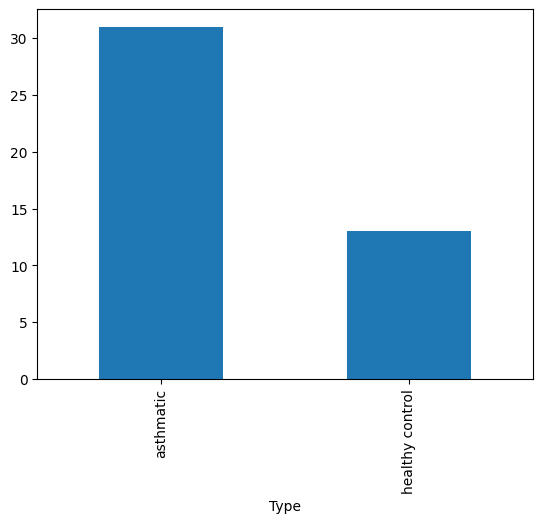

In [13]:
GSE201955_metadata_df.Type.value_counts().plot.bar()

### GSE67472

In [14]:
##############################
# GSE67472
##############################

# path to your downloaded file
GSE67472_metadata_path = 'downloads/GSE67472_series_matrix.txt.gz'
Type = {"asthma": "asthmatic", "healthy":"healthy control"}
# read metadata
with gzip.open(GSE67472_metadata_path, 'rt') as file:
    GSE67472_metadata_df = pd.read_csv(file, sep='\t', skiprows = 35, low_memory=False)
    GSE67472_metadata_df.index = GSE67472_metadata_df.iloc[:,0]
    GSE67472_metadata_df = GSE67472_metadata_df.iloc[:,1:].T.iloc[:,:]

    GSE67472_metadata_df["Source"] = [term.split(": ")[-1] for term in GSE67472_metadata_df.iloc[:,6]]
    GSE67472_metadata_df["Age"] = [int(term.split(": ")[-1]) for term in GSE67472_metadata_df.iloc[:,9]]
    GSE67472_metadata_df["Gender"] = [term.split(": ")[-1] for term in GSE67472_metadata_df.iloc[:,10]]
    GSE67472_metadata_df["Type"] = [Type[term.split(": ")[-1]] for term in GSE67472_metadata_df.iloc[:,11]]

    GSE67472_metadata_df["Sample Names"] = GSE67472_metadata_df.index
    GSE67472_metadata_matrix_df = GSE67472_metadata_df.filter(regex='_at$')
    GSE67472_metadata_matrix_df = GSE67472_metadata_matrix_df.T
    GSE67472_metadata_df = GSE67472_metadata_df[["Sample Names", "Age", "Gender", "Type"]]

    new_cols_order = [col for col in GSE67472_metadata_df.index if col in GSE67472_metadata_matrix_df.columns]
    GSE67472_metadata_df = GSE67472_metadata_df.loc[new_cols_order,:]
    GSE67472_metadata_matrix_df = GSE67472_metadata_matrix_df[new_cols_order]
    GSE67472_metadata_matrix_df.index.name = "gene_id"

GSE67472_metadata_matrix_df.dropna(axis =1, inplace = True)
GSE67472_metadata_matrix_df.to_csv('data1/GSE67472_norm_data.csv')
GSE67472_metadata_df.to_csv('data1/GSE67472_metadata.csv', index=True, index_label = "")

In [15]:
GSE67472_metadata_matrix_df.head()

,"Airway epithelium, asthma sample 01","Airway epithelium, asthma sample 02","Airway epithelium, asthma sample 03","Airway epithelium, healthy sample 01","Airway epithelium, asthma sample 04","Airway epithelium, healthy sample 02","Airway epithelium, healthy sample 03","Airway epithelium, healthy sample 04","Airway epithelium, healthy sample 05","Airway epithelium, healthy sample 06",...,"Airway epithelium, asthma sample 55","Airway epithelium, asthma sample 56","Airway epithelium, asthma sample 57","Airway epithelium, asthma sample 58","Airway epithelium, healthy sample 42","Airway epithelium, healthy sample 43","Airway epithelium, asthma sample 59","Airway epithelium, asthma sample 60","Airway epithelium, asthma sample 61","Airway epithelium, asthma sample 62"
gene_id,,,,,,,,,,,,,,,,,,,,,
100009676_at,5.329071547,5.995748893,5.702682106,5.583716671,5.743467277,5.353754493,6.025470454,5.650019353,5.410087186,5.698754353,...,5.777563342,5.940617557,6.212109452,5.155937141,5.593881791,5.275508898,5.904928875,5.763864034,5.495023896,5.660237005
10000_at,4.888652855,4.980210398,5.371423871,4.834860071,4.736443571,4.81540757,5.326011221,4.760849,5.02678808,4.876486457,...,4.590757631,4.85326964,4.624848777,5.689781113,4.846254954,4.919633801,4.931260627,4.979485469,4.410893347,4.751539762
10001_at,6.717173848,6.641972593,7.234997612,7.108063408,7.148278016,6.537908855,7.00407021,6.878506682,6.88360835,7.005311172,...,7.187373751,7.07472663,6.457011814,7.093481916,7.170474778,6.963929687,6.904204107,6.060580916,7.034825377,6.464824013
10002_at,4.90333291,4.99135392,5.398428846,5.141135783,4.757029096,4.728937649,5.018989185,4.942277947,4.988154919,5.040088538,...,4.994081366,4.677486418,4.810584782,4.866002927,5.054318213,5.130380558,4.812998611,5.331554445,4.766541632,4.63158192
10003_at,4.445861467,4.354581174,4.379199295,4.159464699,4.754784818,4.670810258,4.457705912,4.450294254,4.822193322,4.811337737,...,4.326714092,4.274804928,4.193975149,4.639610481,4.442833559,5.273828208,4.316886107,5.12560188,4.151240481,4.561554813


In [16]:
GSE67472_metadata_df.head()

!Sample_title,Sample Names,Age,Gender,Type
"Airway epithelium, asthma sample 01","Airway epithelium, asthma sample 01",37,female,asthmatic
"Airway epithelium, asthma sample 02","Airway epithelium, asthma sample 02",54,female,asthmatic
"Airway epithelium, asthma sample 03","Airway epithelium, asthma sample 03",50,female,asthmatic
"Airway epithelium, healthy sample 01","Airway epithelium, healthy sample 01",45,male,healthy control
"Airway epithelium, asthma sample 04","Airway epithelium, asthma sample 04",40,female,asthmatic


<Axes: xlabel='Type'>

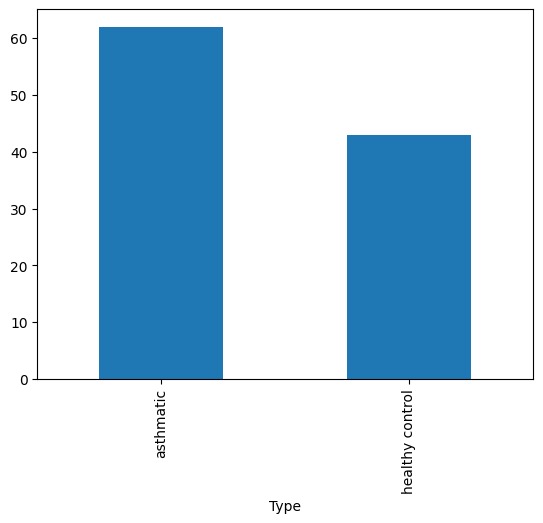

In [17]:
GSE67472_metadata_df.Type.value_counts().plot.bar()

In [18]:
##############################
# GSE69683
##############################

# path to your downloaded file
GSE69683_metadata_path = 'downloads/GSE69683_series_matrix.txt.gz'

Ori_Type = {'Severe asthma': "severely asthmatic", 'Healthy':"healthy control", 'Moderate asthma':"moderately asthmatic"}
Type = {'Severe asthma': "asthmatic", 'Healthy':"healthy control", 'Moderate asthma':"asthmatic"}

# read metadata
with gzip.open(GSE69683_metadata_path, 'rt') as file:
    GSE69683_metadata_df = pd.read_csv(file, sep='\t', skiprows = 26, low_memory=False)
    GSE69683_metadata_df.index = GSE69683_metadata_df.iloc[:,0]
    GSE69683_metadata_df = GSE69683_metadata_df.iloc[:,1:].T.iloc[:,:]

    GSE69683_metadata_df["Smoking"] = [term.split(": ")[-1].split(", ")[1] for term in GSE69683_metadata_df.iloc[:,8]]
    GSE69683_metadata_df["Type"] = [Type[term.split(": ")[-1].split(", ")[0]] for term in GSE69683_metadata_df.iloc[:,8]]
    GSE69683_metadata_df["Ori_Type"] = [Ori_Type[term.split(": ")[-1].split(", ")[0]] for term in GSE69683_metadata_df.iloc[:,8]]
    GSE69683_metadata_df["Gender"] = [term.split(": ")[-1] for term in GSE69683_metadata_df.iloc[:,9]]
    GSE69683_metadata_df["Race"] = [term.split(": ")[-1] for term in GSE69683_metadata_df.iloc[:,10]]

    GSE69683_metadata_df["Sample Names"] = GSE69683_metadata_df.index
    GSE69683_metadata_matrix_df = GSE69683_metadata_df.filter(regex='_at$')
    GSE69683_metadata_matrix_df = GSE69683_metadata_matrix_df.T
    GSE69683_metadata_df = GSE69683_metadata_df[["Sample Names", "Smoking", "Gender", "Race", "Type", "Ori_Type"]]

    new_cols_order = [col for col in GSE69683_metadata_df.index if col in GSE69683_metadata_matrix_df.columns]
    GSE69683_metadata_df = GSE69683_metadata_df.loc[new_cols_order,:]
    GSE69683_metadata_matrix_df = GSE69683_metadata_matrix_df[new_cols_order]
    GSE69683_metadata_matrix_df.index.name = "gene_id"

GSE69683_metadata_matrix_df.dropna(axis =1, inplace = True)
GSE69683_metadata_matrix_df.to_csv('data1/GSE69683_norm_data.csv')
GSE69683_metadata_df.to_csv('data1/GSE69683_metadata.csv', index=True, index_label = "")

In [19]:
GSE69683_metadata_matrix_df.head()

,A_220,A_251,A_483,A_282,A_021,A_325,A_596,A_494,A_515,A_243,...,A_406,A_400,A_585,A_625,A_663,A_586,A_433,A_276,A_577,A_543
gene_id,,,,,,,,,,,,,,,,,,,,,
1007_PM_s_at,4.58,5.62,4.9,4.33,5.3,5.24,5.08,5.01,5.04,4.54,...,5.24,4.78,4.93,4.79,5.04,5.59,4.62,5.13,6.03,5.58
1053_PM_at,6.72,6.44,6.75,6.57,6.64,6.86,6.53,7,6.94,6.91,...,7.21,6.66,7.69,7.25,7.08,6.72,6.84,6.84,6.97,6.84
117_PM_at,8.75,8.44,8.26,9.16,9.29,9.14,9.23,9.8,9.6,9.15,...,10.05,8.75,10.23,9.77,9.5,8.98,8.5,9.36,9.34,8.61
121_PM_at,5.43,4.53,5.04,5.04,4.85,5.55,5.4,5.29,5.44,5.42,...,5.18,5.13,5.33,4.96,4.91,5,4.83,5.1,4.62,5.15
1255_PM_g_at,2.63,2.48,2.54,2.71,2.59,2.62,2.56,2.73,2.67,2.63,...,2.5,2.5,2.61,2.36,2.62,2.52,2.47,2.45,2.65,2.6


In [20]:
GSE69683_metadata_df.head()

!Sample_title,Sample Names,Smoking,Gender,Race,Type,Ori_Type
A_220,A_220,non-smoking,male,white_caucasian,asthmatic,severely asthmatic
A_251,A_251,non-smoking,female,south_east_asian,asthmatic,severely asthmatic
A_483,A_483,non-smoking,male,white_caucasian,healthy control,healthy control
A_282,A_282,non-smoking,female,white_caucasian,asthmatic,moderately asthmatic
A_021,A_021,non-smoking,female,white_caucasian,healthy control,healthy control


<Axes: xlabel='Type'>

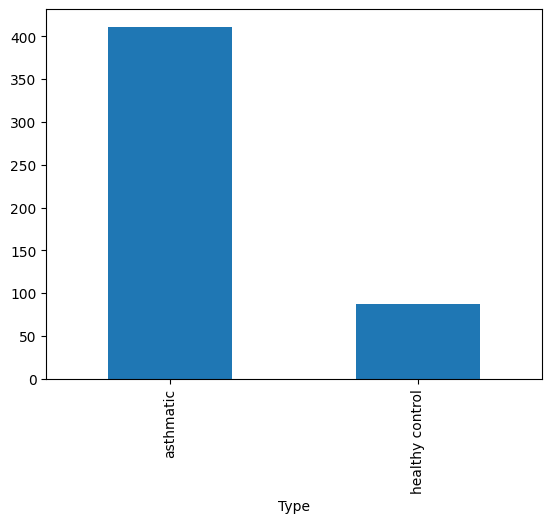

In [21]:
GSE69683_metadata_df.Type.value_counts().plot.bar()

<Axes: xlabel='Ori_Type'>

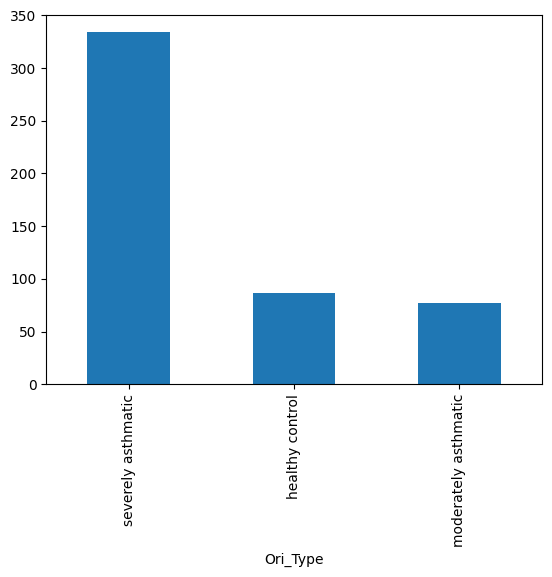

In [22]:
GSE69683_metadata_df.Ori_Type.value_counts().plot.bar()

### Create Annotation for GSE69683 and GSE67472


In [2]:
# annotation data: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GPL13158

# Read the table into a DataFrame, skipping the first 16 rows
file_path = "downloads/GPL13158-5065.txt"
data = pd.read_csv(file_path, sep='\t', skiprows=0, low_memory=False)
data = data[["ID", "Gene Symbol", "ENTREZ_GENE_ID"]]
# Display the first few rows of the DataFrame
data.head()

,ID,Gene Symbol,ENTREZ_GENE_ID
0,1007_PM_s_at,DDR1,780
1,1053_PM_at,RFC2,5982
2,117_PM_at,HSPA6,3310
3,121_PM_at,PAX8,7849
4,1255_PM_g_at,GUCA1A,2978


In [12]:
data = data.dropna()

# Split multiple gene symbols and take the first one
data['Gene Symbol'] = data['Gene Symbol'].apply(lambda x: x.split(' /// ')[0])

# Create a dictionary to map ID to gene symbol
AFF_PM_to_ALIAS = dict(zip(data['ID'], data['Gene Symbol']))
ENTREZID_to_ALIAS = dict(zip(data['ENTREZ_GENE_ID'], data['Gene Symbol']))

new_ENTREZID_to_ALIAS = {}
for key1, value in ENTREZID_to_ALIAS.items():
    for key2 in key1.split("///"):
        new_ENTREZID_to_ALIAS[key2] = value
        
GEO_map = {"AFF_PM_to_ALIAS":AFF_PM_to_ALIAS, "ENTREZID_to_ALIAS":new_ENTREZID_to_ALIAS}

# save mapping object
import json
json_object = json.dumps(GEO_map, indent=2)

with open("data2/Affymetrix_map.json", "w") as file_obj:
    file_obj.write(json_object)